# Scoring
#### Gros probleme, la variable fraude a seulement 7246 on peut avoir un modele bete que previse toujours 0....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\autorisations.csv")

In [3]:
data.head()

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,...,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0,840,02/12/2003,17:47:52,02/12/2003,15,5812,69.25,0,0,...,69.25,69.25,1,1,1,1,1,1,1,1
1,1,158,25/11/2003,06:00:20,25/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1
2,2,826,12/11/2003,14:10:57,12/11/2003,15,5211,516.95,0,0,...,516.95,516.95,1,1,1,1,1,1,1,1
3,3,840,07/11/2003,03:41:55,07/11/2003,14,7399,0.01,0,0,...,0.01,0.01,1,1,1,1,1,1,1,1
4,4,158,23/11/2003,05:07:03,23/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1


In [4]:
data.shape

(1151432, 25)

In [5]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [6]:
data["fraude"].sum()/len(data)

0.006293033370620237

In [7]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [8]:
info_df_num = data.describe()
info_types = pd.DataFrame(data.dtypes)

In [9]:
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(data)

print(info_df_num_2)

                   variables  Nb value distinct  Nb value missing  \
0                      Carte             198044                 0   
1                       Pays                167                 0   
2                    CodeRep                 15                 0   
3                        MCC                661                 0   
4                    Montant              81202                 0   
5                     fraude                  2                 0   
6    FM_Velocity_Condition_3                 47                 0   
7    FM_Velocity_Condition_6                 82                 0   
8   FM_Velocity_Condition_12                111                 0   
9   FM_Velocity_Condition_24                130                 0   
10                  FM_Sum_3             109836                 0   
11                  FM_Sum_6             115524                 0   
12                 FM_Sum_12             121192                 0   
13                 FM_Sum_24      

In [10]:
list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

   variables  Nb value distinct  Nb value missing
0       Date                243                 0
1      Heure              85697                 0
2  dateheure                243                 0


In [11]:
data["Heure"] = data["Heure"].str.split(':', expand=True)[0]
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')
data["Month"] = data["Date"].dt.month
data["Month"] = data["Month"].astype('object')
data["CodeRep"]=np.where(data["CodeRep"] == 0,1,0)

# Division of test and train data.
Is it necessary to do it before analysing for possible seasonalities or country risk?

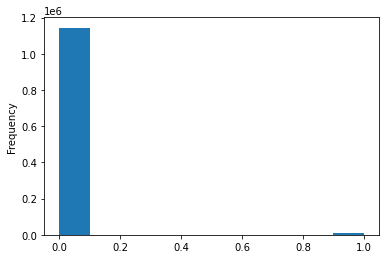

In [12]:
data["fraude"].plot(kind = 'hist');

In [13]:
X = data.drop(columns=["fraude","Carte", "Date", "dateheure", "MCC"])
Y = data["fraude"]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, stratify=Y)
train = X_train.join(Y_train)

## Is there a country specific risk involved?

In [15]:
summa= train.groupby("Pays").sum()[["fraude"]]
summa.sort_values(by="fraude")

,fraude
Pays,
8,0
512,0
508,0
498,0
496,0
...,...
56,381
380,484
840,654


In [16]:
counts = pd.Series(train["Pays"]).value_counts()
counts = pd.DataFrame(counts)
counts = counts.rename(columns={"Pays":"NTrans"})

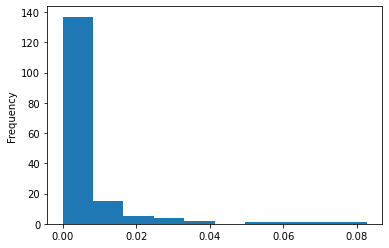

In [17]:
cmerged = pd.merge(counts,summa,left_index=True, right_index=True)
cmerged.reset_index(inplace=True)
cmerged = cmerged.rename(columns={"index":"Pays"})
cmerged["Fratio"] = cmerged["fraude"]/cmerged["NTrans"]
cmerged["Fratio"].plot(kind = 'hist');

In [18]:
sum(cmerged["Fratio"]>0.025)

10

In [19]:
cmerged[(cmerged["Fratio"]>0.025)]

,Pays,NTrans,fraude,Fratio
13,36,5561,145,0.026074
14,76,5204,264,0.050730
17,792,4293,256,0.059632
39,356,1798,48,0.026696
53,188,834,28,0.033573
64,608,566,15,0.026502
79,320,254,9,0.035433
97,862,133,11,0.082707
98,218,125,9,0.072000
104,690,98,3,0.030612


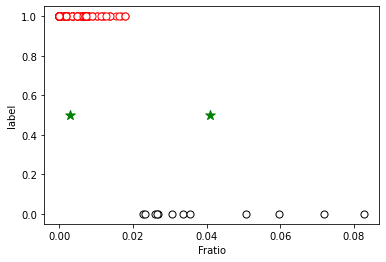

In [20]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
cmerged['label'] = kmeans.fit_predict(cmerged[['Fratio']])
ax = cmerged[cmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
cmerged[cmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [21]:
cmerged[cmerged['label']==1]

,Pays,NTrans,fraude,Fratio,label
0,840,135936,654,0.004811,1
1,724,128421,896,0.006977,1
2,56,115498,381,0.003299,1
3,826,106625,680,0.006377,1
4,380,70510,484,0.006864,1
...,...,...,...,...,...
162,275,1,0,0.000000,1
163,328,1,0,0.000000,1
164,8,1,0,0.000000,1
165,231,1,0,0.000000,1


In [22]:
# K-Means and a 0.025 threshold level bring the same result

#### And the high risk countries are: Australia (36), Brasil (76), Turkey (792), India (356), Costa Rica (188), Philippines (608), Taiwan (158), Guatemala (320), Ecuador (218), Venezuela (862).

In [23]:
X_train["Pays_ris"]=0

In [24]:
X_train["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_train['AUX1'] = np.where(np.logical_or(X_train.Pays==36, X_train.Pays==76, X_train.Pays==792)
                               ,1, 0)
X_train['AUX2'] = np.where(np.logical_or(X_train.Pays==356, X_train.Pays==188, X_train.Pays==608)
                               ,1, 0)
X_train['AUX3'] = np.where(np.logical_or(X_train.Pays==158, X_train.Pays==320, X_train.Pays==218)
                               ,1, 0)
X_train['AUX4'] = np.where(X_train.Pays==862,1,0)
X_train['AUX12'] = np.where(np.logical_or(X_train.AUX1==1, X_train.AUX2==1)
                               ,1, 0)
X_train['Pays_ris'] = np.where(np.logical_or(X_train.AUX12==1, X_train.AUX3==1, X_train.AUX4==1)
                               ,1, 0)
X_train = X_train.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [25]:
X_test["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_test['AUX1'] = np.where(np.logical_or(X_test.Pays==36, X_test.Pays==76, X_test.Pays==792)
                               ,1, 0)
X_test['AUX2'] = np.where(np.logical_or(X_test.Pays==356, X_test.Pays==188, X_test.Pays==608)
                               ,1, 0)
X_test['AUX3'] = np.where(np.logical_or(X_test.Pays==158, X_test.Pays==320, X_test.Pays==218)
                               ,1, 0)
X_test['AUX4'] = np.where(X_test.Pays==862,1,0)
X_test['AUX12'] = np.where(np.logical_or(X_test.AUX1==1, X_test.AUX2==1)
                               ,1, 0)
X_test['Pays_ris'] = np.where(np.logical_or(X_test.AUX12==1, X_test.AUX3==1, X_test.AUX4==1)
                               ,1, 0)
X_test = X_test.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [26]:
sum(X_train["Pays_ris"])/len(X_train)

0.017468939283029075

In [27]:
sum(X_test["Pays_ris"])/len(X_test)

0.0176909938337724

## Verifying if there are clusters in the hours of the day.

In [28]:
sumh= train.groupby("Heure").sum()[["fraude"]]
sumh.sort_values(by="fraude")

,fraude
Heure,
05,71
06,76
07,81
04,96
08,97
03,101
02,128
09,134
01,152


In [29]:
counth = pd.Series(train["Heure"]).value_counts()
counth = pd.DataFrame(counth)
counth = counth.rename(columns={"Heure":"NTrans"})

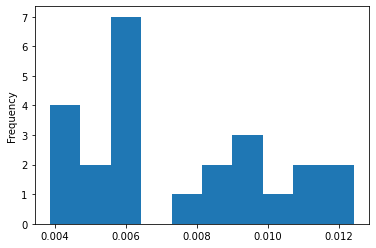

In [30]:
hmerged = pd.merge(counth, sumh, left_index=True, right_index=True)
hmerged.reset_index(inplace=True)
hmerged = hmerged.rename(columns={"index":"Heure"})
hmerged["Fratio"] = hmerged["fraude"]/hmerged["NTrans"]
hmerged["Fratio"].plot(kind = 'hist');

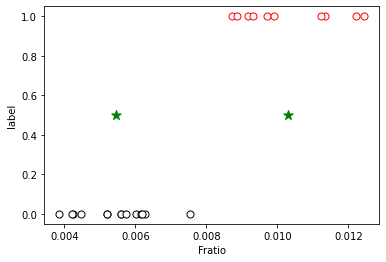

In [31]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
hmerged['label'] = kmeans.fit_predict(hmerged[['Fratio']])
ax = hmerged[hmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
hmerged[hmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [32]:
hmerged[hmerged['label']==1]

,Heure,NTrans,fraude,Fratio,label
9,19,40714,355,0.008719,1
11,20,30940,284,0.009179,1
15,23,21809,193,0.008850,1
16,00,16181,157,0.009703,1
18,01,12443,152,0.012216,1
19,02,10296,128,0.012432,1
20,03,8904,101,0.011343,1
21,04,8558,96,0.011218,1
22,06,8164,76,0.009309,1
23,05,7159,71,0.009918,1


Fraudes are more frequent during night hours even if it is possible that they are constant during the day and the thing which changes the most is the number of transactions during the day.

## Checking possible seasonalities.

In [33]:
summ= train.groupby("Month").sum()[["fraude"]]
summ.sort_values(by="fraude")

,fraude
Month,
4,488
2,538
11,553
3,592
5,687
1,716
12,729
6,769


In [34]:
mcount = pd.Series(train["Month"]).value_counts()
mcount = pd.DataFrame(mcount)
mcount = mcount.rename(columns={"Month":"NTrans"})

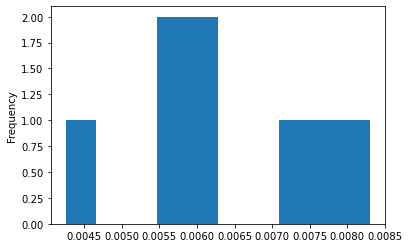

In [35]:
mmerged = pd.merge(mcount, summ, left_index=True, right_index=True)
mmerged.reset_index(inplace=True)
mmerged = mmerged.rename(columns={"index":"Month"})
mmerged["Fratio"] = mmerged["fraude"]/mmerged["NTrans"]
mmerged["Fratio"].plot(kind = 'hist');

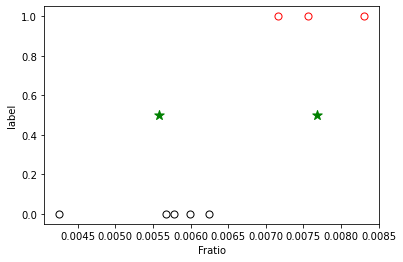

In [36]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
mmerged['label'] = kmeans.fit_predict(mmerged[['Fratio']])
ax = mmerged[mmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
mmerged[mmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [37]:
mmerged[mmerged['label']==1]

,Month,NTrans,fraude,Fratio,label
2,6,107390,769,0.007161,1
4,12,96385,729,0.007563,1
7,1,86234,716,0.008303,1


In [38]:
mmerged[mmerged['label']==0]

,Month,NTrans,fraude,Fratio,label
0,5,118915,687,0.005777,0
1,4,114683,488,0.004255,0
3,3,98880,592,0.005987,0
5,2,94918,538,0.005668,0
6,11,88597,553,0.006242,0


In this case I can't see a difference in frauds given the month.

# Modelisation

In [39]:
X_train = X_train.drop(columns=["Heure","Month"]) # Can be held eventually